In [133]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Test1

In [70]:
# + 184??
header=120268

In [159]:
f = open('test.ecd', "r")
a0 = np.fromfile(f,dtype='int8' , count=120268 )
b0 = np.fromfile(f,dtype='int8',count=74944)
c0= np.fromfile(f,dtype='int8')
f.close()


In [160]:
f = open('test.ecd', "r")
a1 = np.fromfile(f,dtype='int8' , count=120268+184)
b1 = np.fromfile(f,dtype='int8',count=74944)
c1 = np.fromfile(f,dtype='int8')
f.close()



In [79]:
# int8 -128,128

In [161]:
a0.size,b0.size,c0.size

(120268, 74944, 184)

In [138]:
a1.size,b1.size,c1.size

(120452, 74944, 0)

In [121]:
b=np.reshape(b,(int(len(b)/16),16))
#signo ordea las cosas columnas primero

In [153]:
df0=pd.DataFrame(np.reshape(b0,(int(len(b0)/16),16)),
                 columns=['x'+str(i) for i in range(0,16)])
df0['t']=np.arange(0,len(df0))

In [142]:
df1=pd.DataFrame(np.reshape(b1,(int(len(b1)/16),16)),columns=['x'+str(i) for i in range(0,16)])
df1['t']=np.arange(0,len(df1))

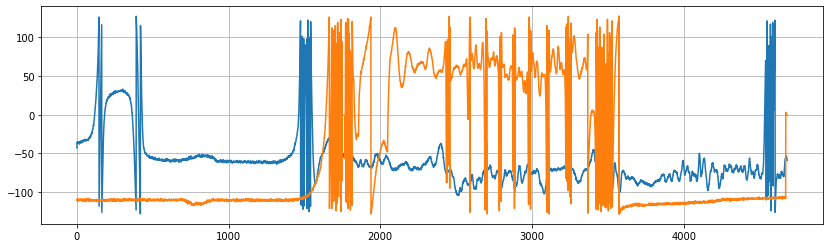

In [154]:
plt.figure(figsize=[14,4])
plt.plot(df0.t,df0.x1)
plt.plot(df1.t,df1.x1)
plt.grid(True)

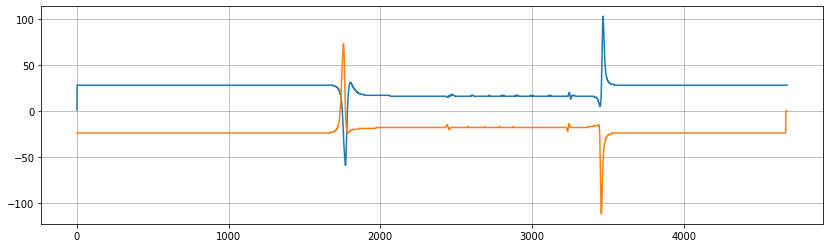

In [145]:
plt.figure(figsize=[14,4])
plt.plot(df0.x2)
plt.plot(df1.x2)
plt.grid(True)

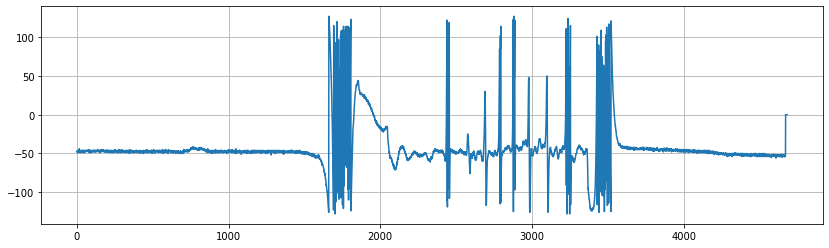

In [125]:
plt.figure(figsize=[14,4])
plt.plot(df.x15)
plt.grid(True)

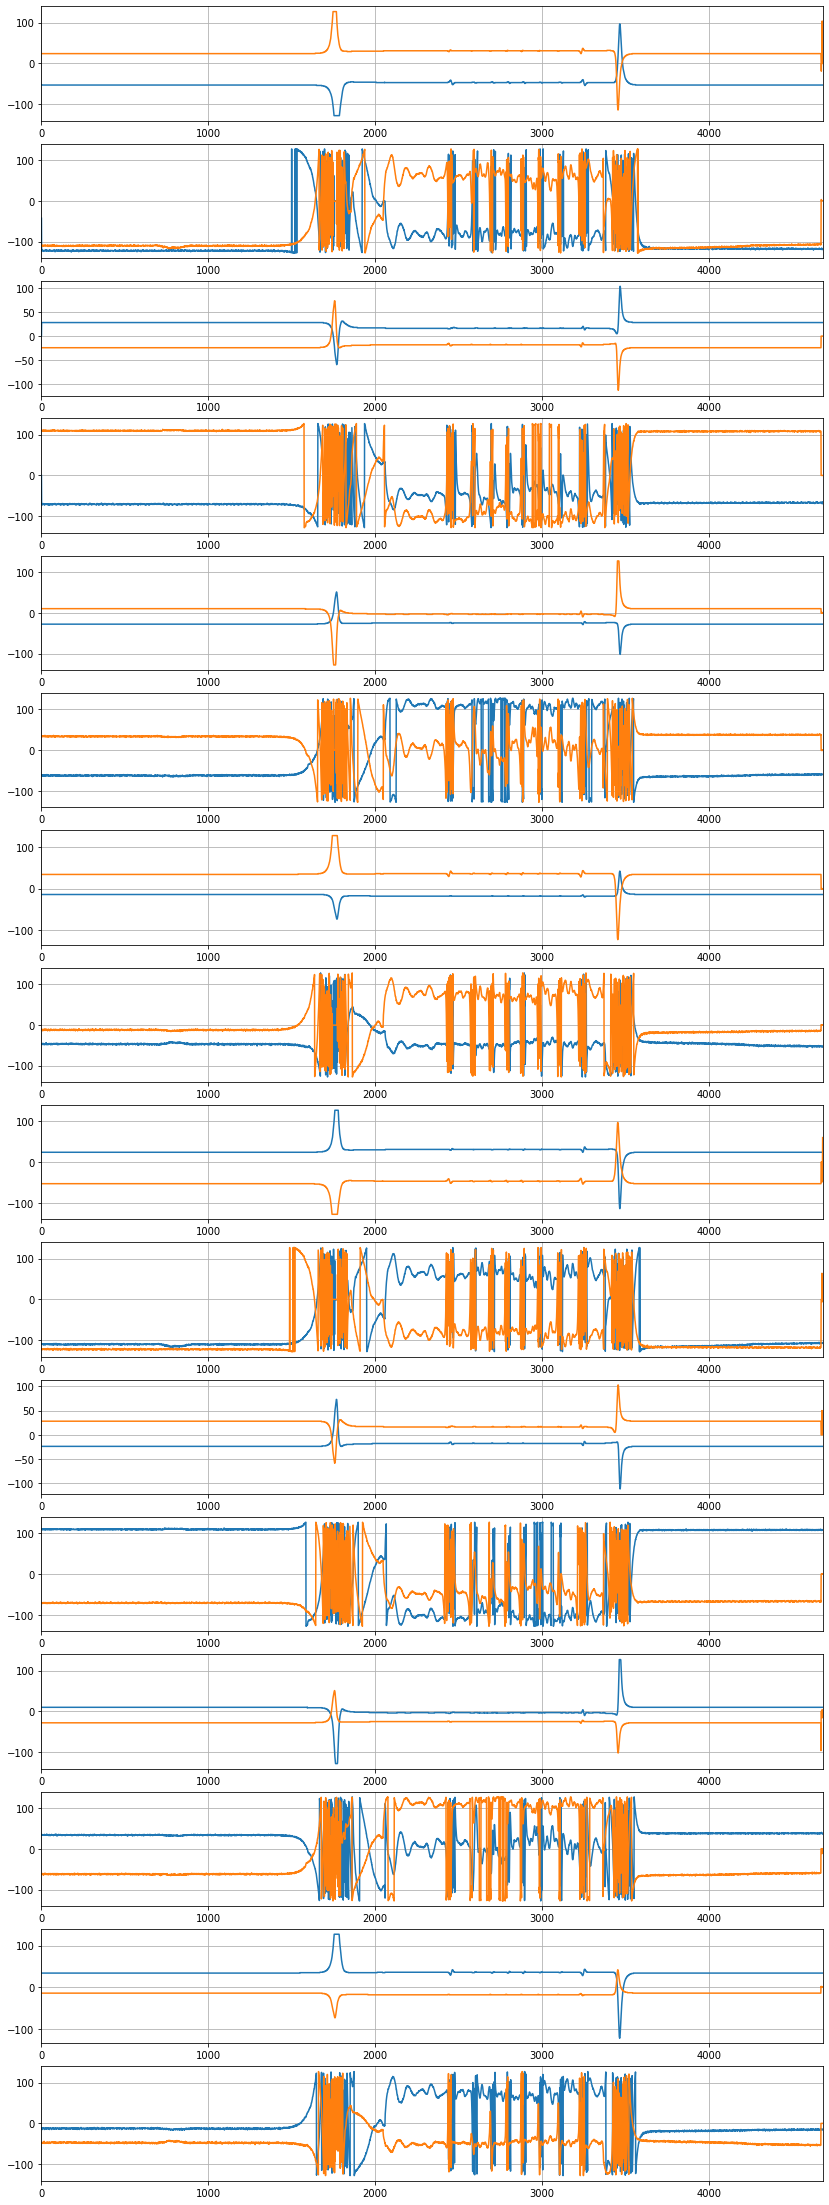

In [150]:
fig, axs = plt.subplots(16, 1,figsize=[14,40])
for i in range(0,16):
    axs[i].plot(df0.t, df0.iloc[:,i])
    axs[i].plot(df1.t, df1.iloc[:,i])
    axs[i].set_xlim(t[0],t[-1])
    axs[i].grid(True)


## Test2.ecd

In [162]:
header2=120268 + 184

In [178]:
f = open('test3.ecd', "r")
a = np.fromfile(f, dtype=np.int8 , count=header2 )
b = np.fromfile(f, dtype=np.int8)
f.close()

In [171]:
#signo ordea las cosas columnas primero

In [179]:
df3=pd.DataFrame(np.reshape(b,(int(len(b)/16),16)),
                 columns=['x'+str(i) for i in range(0,16)])

In [195]:
df3

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15
0,29,-58,-17,82,-5,117,33,7,-42,85,16,84,-26,94,-16,86
1,29,-59,-17,82,-5,118,33,8,-42,85,16,82,-26,95,-16,84
2,29,-59,-17,82,-5,118,33,8,-42,87,16,81,-26,95,-16,87
3,29,-58,-17,82,-5,117,33,7,-42,86,16,81,-26,95,-16,86
4,29,-59,-17,82,-5,117,33,9,-42,87,16,83,-26,96,-16,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34655,4,0,0,0,1,0,0,0,-49,64,50,1,-13,-56,0,0
34656,104,0,0,0,-1,-1,-1,-1,1,0,0,0,4,0,0,0
34657,0,0,0,0,-1,-1,-1,-1,0,0,0,0,0,0,0,0
34658,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


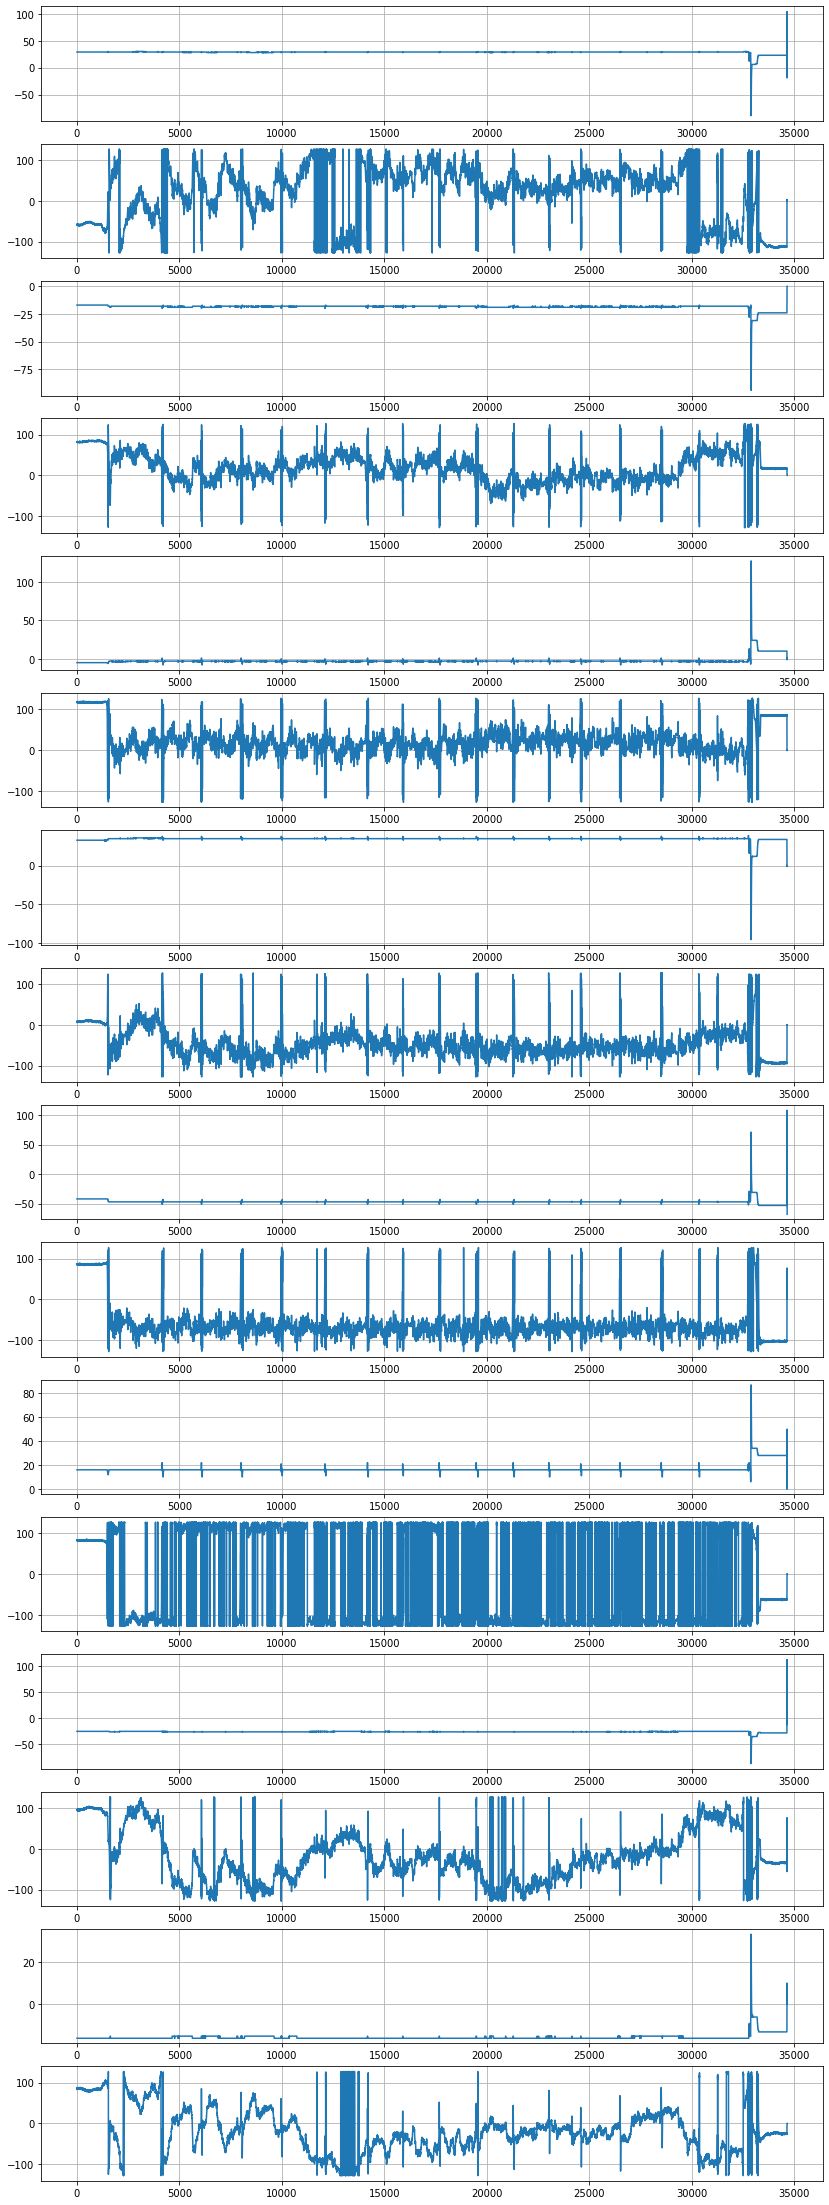

In [192]:
fig, axs = plt.subplots(16, 1,figsize=[14,40])
for i in range(0,16):
    axs[i].plot(df3.iloc[:,i])
    #axs[i].set_xlim(6000,6500)
    axs[i].grid(True)

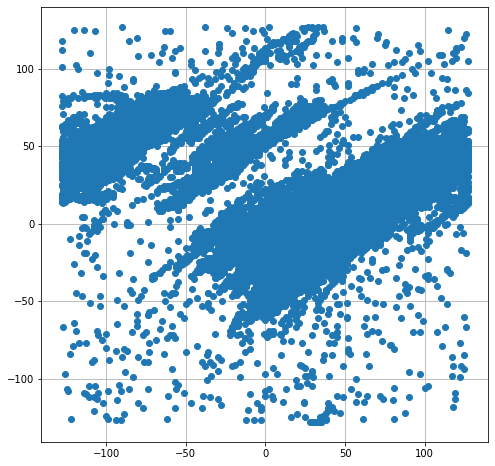

In [211]:
plt.figure(figsize=[8,8])
plt.plot(df3.x1,df3.x3,'o')
plt.grid(True)

## Todos

In [212]:
import os

In [232]:
path='./CondU6SanNicSupCal101'

In [234]:
files=[x for x in os.listdir(path) if 'ecd' in x]

In [246]:
data=[]

In [238]:
path+'/'+files[0]

'./CondU6SanNicSupCal101/DZSanNicSupC1F002C020I011.ecd'

In [247]:
for file in files:
    f = open(path+'/'+file, "r")
    a = np.fromfile(f, dtype=np.int8 , offset=header2 )
    f.close()
    data.append(np.reshape(a,(int(len(a)/16),16)))

In [253]:
for x in data:
    print(len(x))

29030
513
3812
31909
4331
25642
26166
29718
27395
28740
26259
36433
27747
27775
34660
30684
26481
32552
29298
35881
709
31301
28908
20832
25395
29037
32944
33246
27033
773
29783
26491
29532
30039
27281
30219
26290
25006
579
27305
31015
36079
26979
4397
31777
28357
37526
28260
27047
3685
29389
30779
33886
28969
32369
30835
31077
31489
27484
37233
4296
27419
23672
28813
28812
29553
32104
36110
24451
32139
35918
1512
31262
28074
38437
41215
4684
34364
29626
33365
27169
26737
25648
29300
31137
25974


In [251]:
def plot(data):
    fig, axs = plt.subplots(16, 1,figsize=[14,40])
    for i in range(0,16):
        axs[i].plot(data[:,i])
        #axs[i].set_xlim(6000,6500)
        axs[i].grid(True)

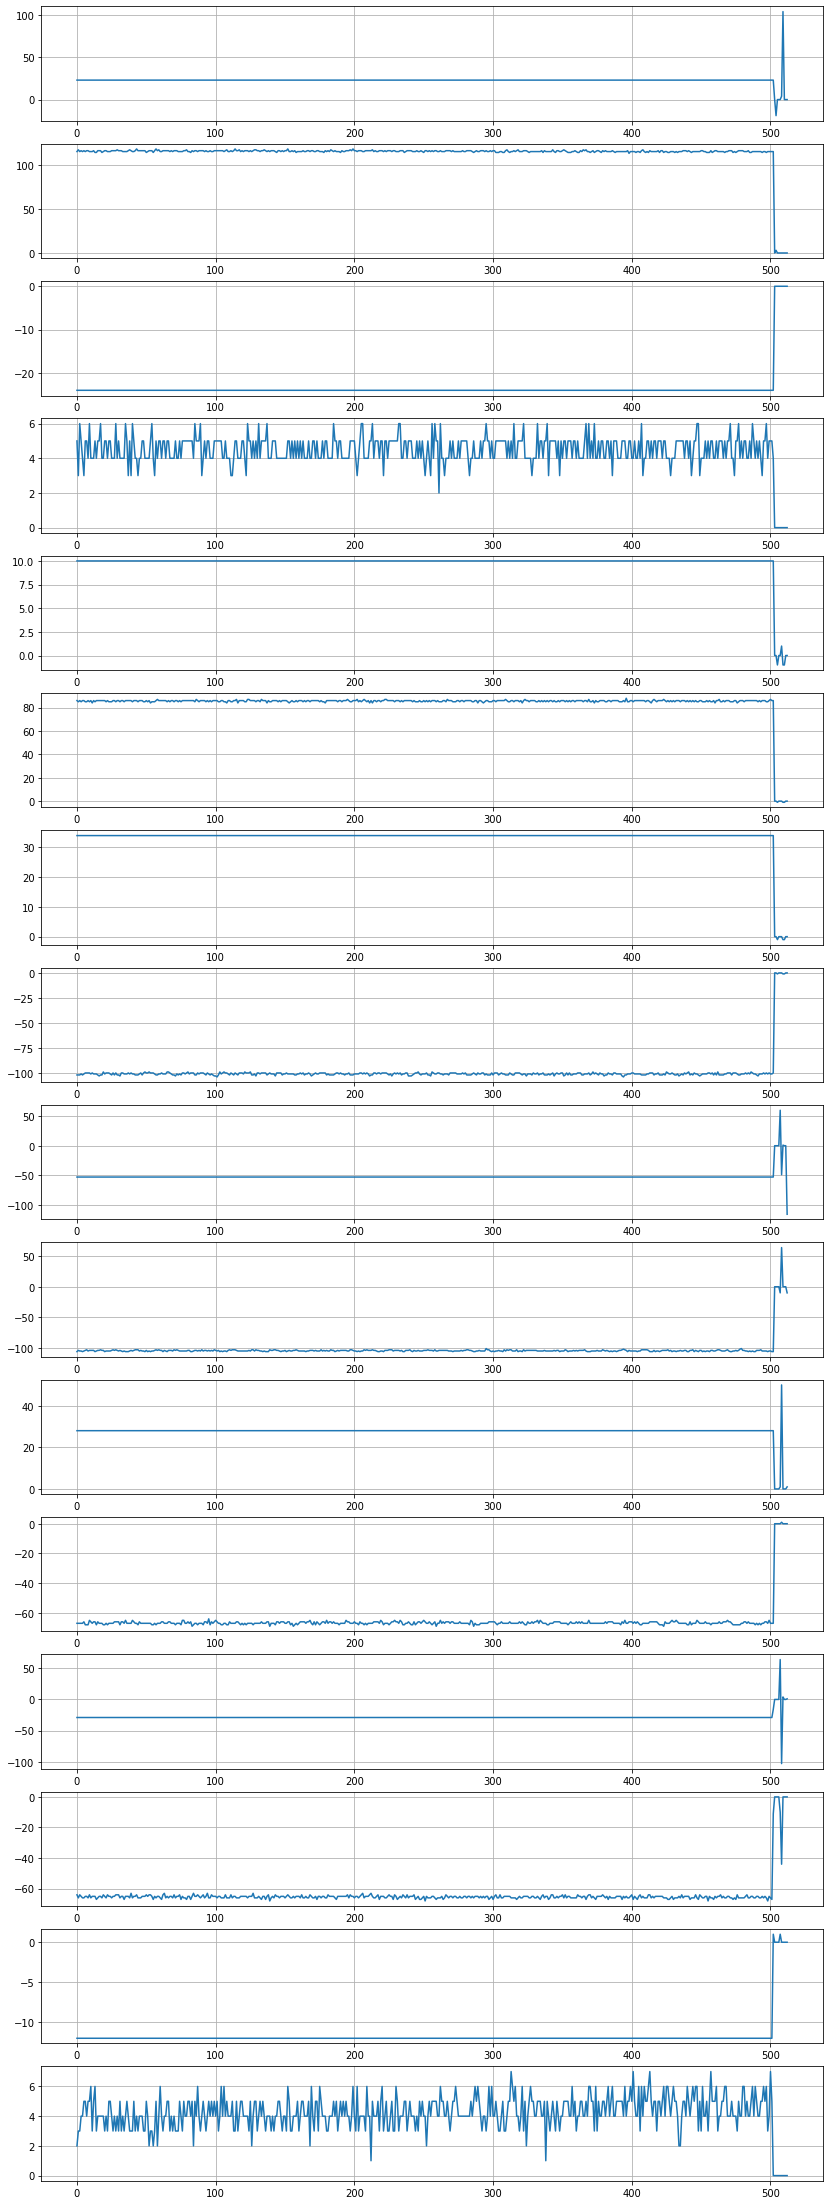

In [254]:
plot(data[1])